## Аналитика в Pandas

In [1]:
import numpy as np
import pandas as pd

In [154]:
df = pd.read_csv('youtube_data_short.csv', sep='\t')

In [15]:
url = 'https://raw.githubusercontent.com/hse-econ-data-science/andan_2023/main/sem03_eda/youtube_data_short.csv'
df = pd.read_csv(url, sep='\t')

In [16]:
type(df)

pandas.core.frame.DataFrame

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19124 entries, 0 to 19123
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 19124 non-null  object 
 1   commentCount          18914 non-null  float64
 2   dislikeCount          18850 non-null  float64
 3   likeCount             18850 non-null  float64
 4   music_style           19124 non-null  object 
 5   performer             19124 non-null  object 
 6   viewCount             19123 non-null  float64
 7   commentators_uniq     12314 non-null  float64
 8   comments_obscene_cnt  12314 non-null  float64
 9   video_age             19124 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 1.5+ MB


In [18]:
df.columns

Index(['title', 'commentCount', 'dislikeCount', 'likeCount', 'music_style',
       'performer', 'viewCount', 'commentators_uniq', 'comments_obscene_cnt',
       'video_age'],
      dtype='object')

In [19]:
df.index

RangeIndex(start=0, stop=19124, step=1)

In [21]:
df.head()

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
0,"""#2Маши ""Свободные линии""",34.0,43.0,1402.0,popsa,2маши,214301.0,24.0,0.0,1141
1,"""ALARM"" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )",NaN,690.0,10532.0,popsa,лазарев,2221419.0,NaN,NaN,3217
2,"""EARTH SONG"" SERGEY LAZAREV. DEDICATED TO MIC...",26.0,10.0,269.0,popsa,лазарев,40327.0,23.0,0.0,3546
3,"""Earth song"" премия МУЗ-тВ 2010 (LIVE)",12.0,7.0,163.0,popsa,лазарев,11907.0,11.0,0.0,3189
4,"""FAKE"" СЕРГЕЙ ЛАЗАРЕВ (SERGEY)",46.0,19.0,597.0,popsa,лазарев,91483.0,33.0,1.0,3361


## 1. Доставать часть информации

In [22]:
df['likeCount']

0         1402.0
1        10532.0
2          269.0
3          163.0
4          597.0
          ...   
19119       11.0
19120     1837.0
19121    30603.0
19122      260.0
19123       22.0
Name: likeCount, Length: 19124, dtype: float64

In [23]:
df.likeCount

0         1402.0
1        10532.0
2          269.0
3          163.0
4          597.0
          ...   
19119       11.0
19120     1837.0
19121    30603.0
19122      260.0
19123       22.0
Name: likeCount, Length: 19124, dtype: float64

In [24]:
df[['likeCount', 'dislikeCount']]

,likeCount,dislikeCount
0,1402.0,43.0
1,10532.0,690.0
2,269.0,10.0
3,163.0,7.0
4,597.0,19.0
...,...,...
19119,11.0,0.0
19120,1837.0,431.0
19121,30603.0,15494.0
19122,260.0,10.0


In [30]:
df.iloc[0, 1]

34.0

In [33]:
df.loc[0, 'commentCount']

34.0

In [38]:
type(df.likeCount)

pandas.core.series.Series

In [41]:
df.likeCount > 100

0         True
1         True
2         True
3         True
4         True
         ...  
19119    False
19120     True
19121     True
19122     True
19123    False
Name: likeCount, Length: 19124, dtype: bool

In [43]:
# отобрал клипы с числом лайков больше 100
df[df.likeCount > 100]

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
0,"""#2Маши ""Свободные линии""",34.0,43.0,1402.0,popsa,2маши,214301.0,24.0,0.0,1141
1,"""ALARM"" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )",NaN,690.0,10532.0,popsa,лазарев,2221419.0,NaN,NaN,3217
2,"""EARTH SONG"" SERGEY LAZAREV. DEDICATED TO MIC...",26.0,10.0,269.0,popsa,лазарев,40327.0,23.0,0.0,3546
3,"""Earth song"" премия МУЗ-тВ 2010 (LIVE)",12.0,7.0,163.0,popsa,лазарев,11907.0,11.0,0.0,3189
4,"""FAKE"" СЕРГЕЙ ЛАЗАРЕВ (SERGEY)",46.0,19.0,597.0,popsa,лазарев,91483.0,33.0,1.0,3361
...,...,...,...,...,...,...,...,...,...,...
19116,♫ Музыка Моцарта для детей (Mozart's music for...,41.0,142.0,914.0,classic,classical_channel,308721.0,22.0,0.0,1748
19117,♫♡ Сборник Лучших Мелодий - Наслаждайтесь Восх...,2881.0,4108.0,58429.0,classic,classical_channel,9577433.0,1696.0,5.0,538
19120,❤ 2 ЧАСА ❤ МОЦАРТ Для Младенцев - Колыбельная ...,94.0,431.0,1837.0,classic,classical_channel,391836.0,37.0,1.0,239
19121,モスクワライブショー ' 17,4872.0,15494.0,30603.0,rap,элджей,1187340.0,1788.0,352.0,339


In [45]:
df_rap = df[df.music_style == 'rap']

In [49]:
df_rap.reset_index(drop=True, inplace=True)

#### Хочу вывести клип с наибольшим кол-вом дизлайков

In [61]:
df[df.dislikeCount == df.dislikeCount.max()]

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
1299,FACE - Я РОНЯЮ ЗАПАД (prod. by JuloOntheTrack),303077.0,640698.0,270794.0,rap,face,14799217.0,1541.0,587.0,382


In [62]:
df[df.viewCount == df.viewCount.max()]

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
2635,Miyagi & Эндшпиль feat. Рем Дигга - I Got Love...,73038.0,71155.0,1297718.0,rap,miyagi&эндшпиль,272047706.0,NaN,NaN,650


## 2. Считать показатели

In [55]:
df.likeCount.min()

0.0

In [56]:
df.likeCount.mean()

5735.014482758621

In [57]:
df.likeCount.median()

100.0

In [58]:
df.likeCount.quantile(0.5)

100.0

In [65]:
df.title.apply(len)

0        25
1        41
2        75
3        38
4        30
         ..
19119    35
19120    88
19121    15
19122    65
19123    63
Name: title, Length: 19124, dtype: int64

## 3. Создавать новые колонки

In [69]:
df['title_lower'] = df.title.apply(lambda x: x.lower())

In [73]:
df.sort_values(by='viewCount', ascending=False).head()

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age,title_lower
2635,Miyagi & Эндшпиль feat. Рем Дигга - I Got Love...,73038.0,71155.0,1297718.0,rap,miyagi&эндшпиль,272047706.0,NaN,NaN,650,miyagi & эндшпиль feat. рем дигга - i got love...
18649,Элджей & Feduk - Розовое вино,191702.0,151772.0,1686810.0,rap,feduk,208753182.0,3702.0,183.0,485,элджей & feduk - розовое вино
1412,Four Seasons ~ Vivaldi,51848.0,45120.0,849676.0,classic,classical_channel,196812152.0,1864.0,24.0,2965,four seasons ~ vivaldi
17569,"Тимати feat. Егор Крид - Где ты, где я (премье...",46221.0,75745.0,740358.0,rap,тимати,195537263.0,909.0,49.0,1003,"тимати feat. егор крид - где ты, где я (премье..."
17577,Тимати feat. Рекорд Оркестр - Баклажан (Лада С...,47672.0,148211.0,587808.0,rap,тимати,173244960.0,914.0,19.0,1284,тимати feat. рекорд оркестр - баклажан (лада с...


In [74]:
df['likeCount_share'] = df['likeCount'] / df['viewCount']

In [78]:
df[df.viewCount > 100_000].sort_values(by='likeCount_share', ascending=False).head()

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age,title_lower,likeCount_share
11351,ЛСП. Ирония судьбы или Tragic City.,2090.0,659.0,34149.0,rap,лсп,272163.0,1450.0,249.0,89,лсп. ирония судьбы или tragic city.,0.125473
15508,"С чего все начиналось? Итоги 2017 года, лучшие...",2259.0,203.0,29415.0,popsa,кока,294638.0,937.0,3.0,439,"с чего все начиналось? итоги 2017 года, лучшие...",0.099834
12968,Накрыла стол на пол-ляма. Спела на MTV. Разреш...,606.0,173.0,24179.0,popsa,кока,246861.0,433.0,4.0,532,накрыла стол на пол-ляма. спела на mtv. разреш...,0.097946
12404,Мой Инстаграм взломан! Помогите.,9472.0,343.0,31937.0,popsa,кока,353824.0,893.0,6.0,389,мой инстаграм взломан! помогите.,0.090262
8597,Дом 2 / Где логика у Натана? / Кто расцарапал ...,1917.0,386.0,36513.0,popsa,кока,412456.0,918.0,12.0,483,дом 2 / где логика у натана? / кто расцарапал ...,0.088526


## 4. Группировка

In [80]:
df.groupby('music_style')['likeCount'].mean().sort_values(ascending=False)

music_style
classic    28663.333333
rap        26802.456253
popsa       7492.273792
indi        2471.842299
rock        2132.887061
estrada      938.686662
shanson      440.390564
Name: likeCount, dtype: float64

In [81]:
df.groupby('music_style')['likeCount'].median().sort_values(ascending=False)

music_style
rap        2656.0
classic     536.0
popsa       323.0
rock         80.0
estrada      47.0
indi         37.0
shanson      17.0
Name: likeCount, dtype: float64

In [83]:
df.groupby(['music_style', 'performer'])['likeCount'].median()

music_style  performer        
classic      classical_channel    536.0
estrada      агутин                 4.0
             басков                 9.0
             буйнов                 1.0
             ваенга                57.0
                                  ...  
shanson      жека                  61.5
             ирина_круг           101.0
             михаил_круг           12.0
             трофимов              18.0
             шуфутинский            6.0
Name: likeCount, Length: 111, dtype: float64

In [87]:
d = {'likeCount': [np.mean, np.max], 
     'dislikeCount': np.max,
     'viewCount': np.sum}

df.groupby('music_style').agg(d)

likeCount            dislikeCount     viewCount
                     mean       amax         amax           sum
music_style                                                    
classic      28663.333333   849676.0      52892.0  1.489967e+09
estrada        938.686662   377957.0     348770.0  9.955589e+08
indi          2471.842299   389416.0      32478.0  2.130432e+08
popsa         7492.273792   698902.0     177367.0  4.559673e+09
rap          26802.456253  1686810.0     640698.0  6.425898e+09
rock          2132.887061   827118.0     133644.0  2.121552e+09
shanson        440.390564    85023.0      12906.0  3.274007e+08

In [93]:
def my_lower(x):
    return x.lower()


df.title.apply(my_lower)

0                                "#2маши "свободные линии"
1                "alarm" сергей лазарев ( sergey lazarev )
2        "earth song"  sergey lazarev. dedicated to mic...
3                   "earth song" премия муз-тв 2010 (live)
4                           "fake" сергей лазарев (sergey)
                               ...                        
19119                  ♫♪мы расстаемся ♫♪  бутырка new2019
19120    ❤ 2 часа ❤ моцарт для младенцев - колыбельная ...
19121                                      モスクワライブショー ' 17
19122    舞梅鬼   -  新年好宝贝 / mumiy troll - happy new year ...
19123    🎄#премьера песни!!! 2019г(вы не спешите говори...
Name: title, Length: 19124, dtype: object

In [94]:
df.title.apply(lambda x: x.lower())

0                                "#2маши "свободные линии"
1                "alarm" сергей лазарев ( sergey lazarev )
2        "earth song"  sergey lazarev. dedicated to mic...
3                   "earth song" премия муз-тв 2010 (live)
4                           "fake" сергей лазарев (sergey)
                               ...                        
19119                  ♫♪мы расстаемся ♫♪  бутырка new2019
19120    ❤ 2 часа ❤ моцарт для младенцев - колыбельная ...
19121                                      モスクワライブショー ' 17
19122    舞梅鬼   -  新年好宝贝 / mumiy troll - happy new year ...
19123    🎄#премьера песни!!! 2019г(вы не спешите говори...
Name: title, Length: 19124, dtype: object

In [92]:
df.title.apply(len)

0        25
1        41
2        75
3        38
4        30
         ..
19119    35
19120    88
19121    15
19122    65
19123    63
Name: title, Length: 19124, dtype: int64

## 5. Визуализировать

In [101]:
import matplotlib.pyplot as plt

# зададим параметры рисуемых нами графиков, например, размер
plt.rcParams['figure.figsize'] = (10, 5)

<AxesSubplot:>

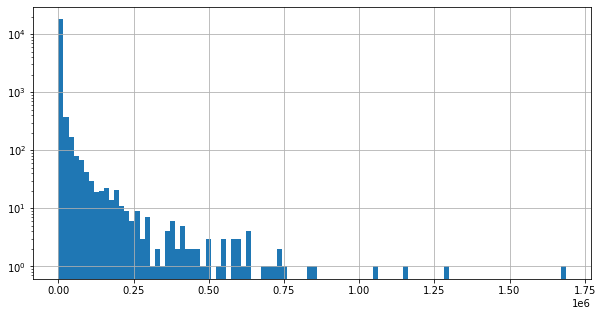

In [102]:
df.likeCount.hist(bins=100, log=True)

In [103]:
import seaborn as sns

In [108]:
df['likeCount_log'] = df.likeCount.apply(lambda x: np.log(x+1))

<AxesSubplot:xlabel='music_style', ylabel='likeCount_log'>

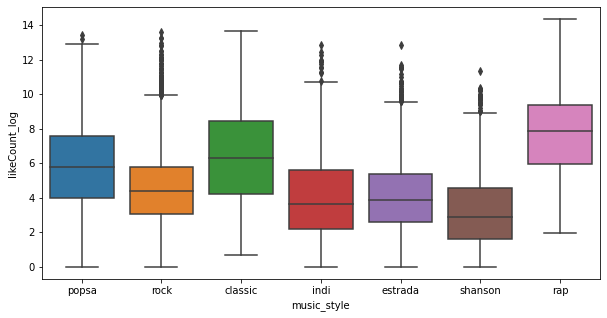

In [109]:
sns.boxplot(data=df, x='music_style', y='likeCount_log')

Сколько наблюдений у меня в каждом жанре

In [112]:
gb = df.groupby('music_style')['title'].count()

''

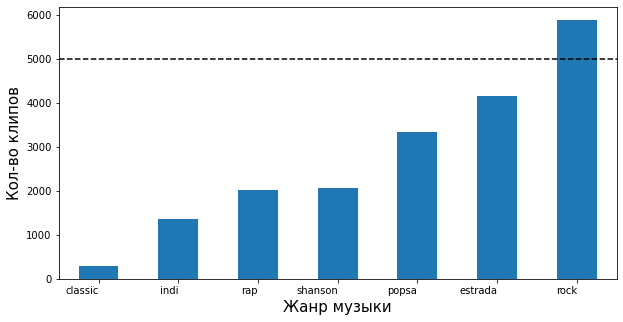

In [148]:
gb.sort_values().plot(kind='bar')

plt.xlabel('Жанр музыки', fontsize=15)
plt.ylabel('Кол-во клипов', fontsize=15)
plt.xticks(rotation=0, ha='right')
plt.axhline(5000, color='black', ls='--');

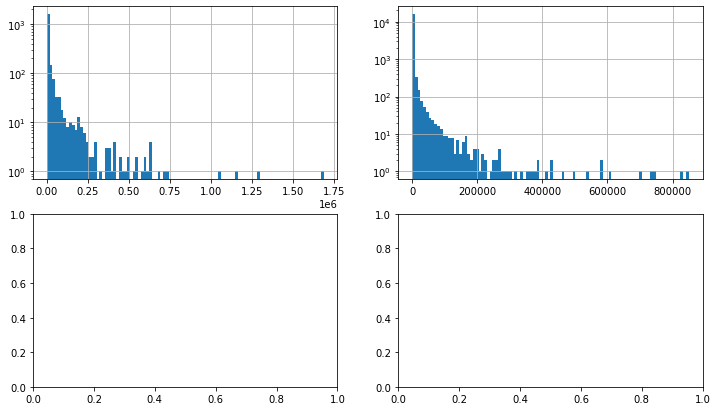

In [146]:
_, axes = plt.subplots(2, 2, figsize=(12, 7))

df[df.music_style == 'rap'].likeCount.hist(ax=axes[0, 0], bins=100, log=True)
df[df.music_style != 'rap'].likeCount.hist(ax=axes[0, 1], bins=100, log=True);

In [126]:
def stat(x):
    return sum(x), max(x)

In [131]:
x = [1, 2, 3]

_, maximum = stat(x)

In [132]:
maximum

3

## 6. Решать проблемы с данными

__Пропуски__

In [150]:
df.dropna()

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age,title_lower,likeCount_share,likeCount_log
0,"""#2Маши ""Свободные линии""",34.0,43.0,1402.0,popsa,2маши,214301.0,24.0,0.0,1141,"""#2маши ""свободные линии""",0.006542,7.246368
2,"""EARTH SONG"" SERGEY LAZAREV. DEDICATED TO MIC...",26.0,10.0,269.0,popsa,лазарев,40327.0,23.0,0.0,3546,"""earth song"" sergey lazarev. dedicated to mic...",0.006670,5.598422
3,"""Earth song"" премия МУЗ-тВ 2010 (LIVE)",12.0,7.0,163.0,popsa,лазарев,11907.0,11.0,0.0,3189,"""earth song"" премия муз-тв 2010 (live)",0.013689,5.099866
4,"""FAKE"" СЕРГЕЙ ЛАЗАРЕВ (SERGEY)",46.0,19.0,597.0,popsa,лазарев,91483.0,33.0,1.0,3361,"""fake"" сергей лазарев (sergey)",0.006526,6.393591
5,"""Feelin High"" Сергей Лазарев Sergey Lazarev live",7.0,7.0,87.0,popsa,лазарев,9217.0,6.0,0.0,3179,"""feelin high"" сергей лазарев sergey lazarev live",0.009439,4.477337
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19116,♫ Музыка Моцарта для детей (Mozart's music for...,41.0,142.0,914.0,classic,classical_channel,308721.0,22.0,0.0,1748,♫ музыка моцарта для детей (mozart's music for...,0.002961,6.818924
19117,♫♡ Сборник Лучших Мелодий - Наслаждайтесь Восх...,2881.0,4108.0,58429.0,classic,classical_channel,9577433.0,1696.0,5.0,538,♫♡ сборник лучших мелодий - наслаждайтесь восх...,0.006101,10.975585
19120,❤ 2 ЧАСА ❤ МОЦАРТ Для Младенцев - Колыбельная ...,94.0,431.0,1837.0,classic,classical_channel,391836.0,37.0,1.0,239,❤ 2 часа ❤ моцарт для младенцев - колыбельная ...,0.004688,7.516433
19121,モスクワライブショー ' 17,4872.0,15494.0,30603.0,rap,элджей,1187340.0,1788.0,352.0,339,モスクワライブショー ' 17,0.025774,10.328886


In [152]:
df.fillna(0, inplace=True)

In [158]:
df.commentCount.fillna(0, inplace=True)

In [155]:
df.isnull().sum()

title                      0
commentCount             210
dislikeCount             274
likeCount                274
music_style                0
performer                  0
viewCount                  1
commentators_uniq       6810
comments_obscene_cnt    6810
video_age                  0
dtype: int64

In [157]:
df.drop('commentators_uniq', axis=1)

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,comments_obscene_cnt,video_age
0,"""#2Маши ""Свободные линии""",34.0,43.0,1402.0,popsa,2маши,214301.0,0.0,1141
1,"""ALARM"" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )",NaN,690.0,10532.0,popsa,лазарев,2221419.0,NaN,3217
2,"""EARTH SONG"" SERGEY LAZAREV. DEDICATED TO MIC...",26.0,10.0,269.0,popsa,лазарев,40327.0,0.0,3546
3,"""Earth song"" премия МУЗ-тВ 2010 (LIVE)",12.0,7.0,163.0,popsa,лазарев,11907.0,0.0,3189
4,"""FAKE"" СЕРГЕЙ ЛАЗАРЕВ (SERGEY)",46.0,19.0,597.0,popsa,лазарев,91483.0,1.0,3361
...,...,...,...,...,...,...,...,...,...
19119,♫♪Мы расстаемся ♫♪ Бутырка new2019,2.0,0.0,11.0,shanson,бутырка,1107.0,NaN,44
19120,❤ 2 ЧАСА ❤ МОЦАРТ Для Младенцев - Колыбельная ...,94.0,431.0,1837.0,classic,classical_channel,391836.0,1.0,239
19121,モスクワライブショー ' 17,4872.0,15494.0,30603.0,rap,элджей,1187340.0,352.0,339
19122,舞梅鬼 - 新年好宝贝 / Mumiy Troll - Happy New Year ...,59.0,10.0,260.0,rock,мумий_тролль,10147.0,0.0,997


__Выбросы__

In [162]:
likeCount_q = df.likeCount.quantile(0.99)

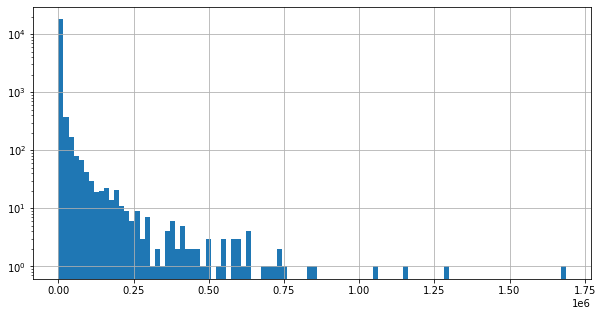

In [167]:
df['likeCount'].hist(log=True, bins=100);

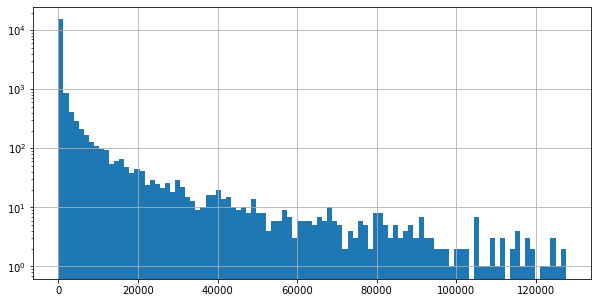

In [166]:
df[df.likeCount < likeCount_q]['likeCount'].hist(log=True, bins=100);

## 7. Много всего другого

In [169]:
df.music_style.value_counts(normalize=True)

rock       0.307885
estrada    0.217057
popsa      0.174597
shanson    0.107770
rap        0.106045
indi       0.071063
classic    0.015583
Name: music_style, dtype: float64

In [172]:
df.music_style.unique()

array(['popsa', 'rock', 'classic', 'indi', 'estrada', 'shanson', 'rap'],
      dtype=object)

In [175]:
df.title.str.lower()

0                                "#2маши "свободные линии"
1                "alarm" сергей лазарев ( sergey lazarev )
2        "earth song"  sergey lazarev. dedicated to mic...
3                   "earth song" премия муз-тв 2010 (live)
4                           "fake" сергей лазарев (sergey)
                               ...                        
19119                  ♫♪мы расстаемся ♫♪  бутырка new2019
19120    ❤ 2 часа ❤ моцарт для младенцев - колыбельная ...
19121                                      モスクワライブショー ' 17
19122    舞梅鬼   -  新年好宝贝 / mumiy troll - happy new year ...
19123    🎄#премьера песни!!! 2019г(вы не спешите говори...
Name: title, Length: 19124, dtype: object

In [176]:
df.title.str.isupper()

0        False
1         True
2        False
3        False
4         True
         ...  
19119    False
19120    False
19121    False
19122    False
19123    False
Name: title, Length: 19124, dtype: bool